In [68]:
!pip freeze >'requirements.txt'

round 0
Centroid 0: 6.4, 4.4
Centroid 1: 16.818181818181817, 7.454545454545454
Centroid 2: 7.655172413793103, 15.310344827586206


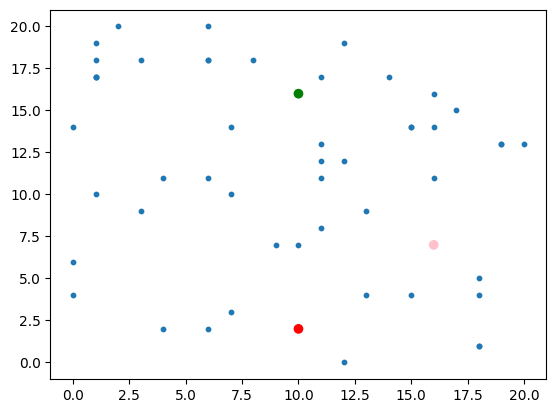

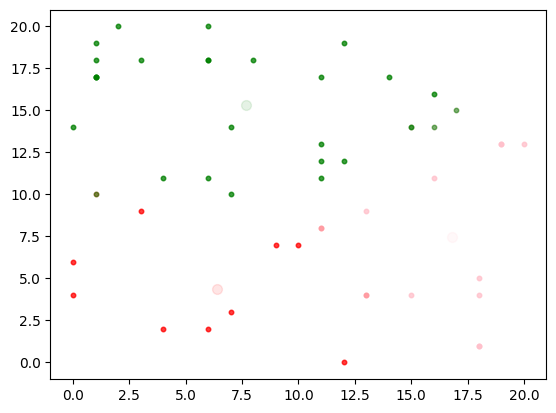

In [67]:
# start of by generating random points
import random
import matplotlib.pyplot as plt


x_max = 20
y_max = 20
num_points = 50

x_arr = [random.randint(0, x_max) for i in range(num_points)]
y_arr = [random.randint(0, y_max) for i in range(num_points)]

k = 3 #upto 10
N = 10 #rounds
color = ['red', 'pink', 'green', 'blue', 'orange', 'purple', 'brown', 'gray', 'olive', 'cyan']

init_plt =  plt.scatter(x=x_arr, y=y_arr,  s=10)

x_c = [random.randint(0, x_max) for i in range(k)]
y_c = [random.randint(0, y_max) for i in range(k)]
#in KNN we randomly select any 3 centroids and then iterate it over N rounds



init_plt =  plt.scatter(x=x_c, y=y_c, c = color[:k],)


#setting our DS to store points n ds
centroids_n_points = {}

for j in range(k):
    centroids_n_points.setdefault( f"centroid_{j}_xy" , [x_c[j], y_c[j]],)
    centroids_n_points.setdefault( f"centroid_{j}_points" , [])


#ASSIGNING POINTS TO CENTERS
#once we get centroids we have to find closest data point and assign to it- so channge color ig?
#but how do we find the closest point? iterate over every point, calculate euclidean distance.
def assign_centroids():
    for i in range(num_points): #so this is just the round 1
        x1 = x_arr[i]
        y1 = y_arr[i]

        nearest_centroid = 0
        nearest_centroid_dist = -1 #-1 to imply its uninitialised, its not possible to have negative distnce

        for j in range(k):     #iterating over centroids
            x2 = centroids_n_points[f"centroid_{j}_xy"][0]
            y2 = centroids_n_points[f"centroid_{j}_xy"][1]
            
            if nearest_centroid_dist == -1: 
                nearest_centroid_dist = get_euclidean_distance(x1, x2, y1, y2)

            dist = get_euclidean_distance(x1, x2, y1, y2)

            if dist < nearest_centroid_dist:
                nearest_centroid = j
                nearest_centroid_dist = dist

        centroids_n_points[f"centroid_{nearest_centroid}_points"].append([x1,y1])


def recalculate_centroids():
    for j in range(k):
        sum_x = 0
        sum_y = 0
        len_pts = len(centroids_n_points[f"centroid_{j}_points"])
        for i in centroids_n_points[f"centroid_{j}_points"]:
            sum_x += i[0]
            sum_y += i[1]
        
        new_posn_x = sum_x/len_pts
        new_posn_y = sum_y/len_pts
        centroids_n_points[f"centroid_{j}_xy"][0] = new_posn_x
        centroids_n_points[f"centroid_{j}_xy"][1] = new_posn_y
        print( f"Centroid {j}: {new_posn_x}, {new_posn_y}")
        



#we have to take mean of points n shift the centroid there
#plot points 
#plot centroids
c_plot = plt.figure()
c_plot = plt.axes()
assign_centroids()
for i in range(1):
    print(f"round {i}")
    recalculate_centroids()
    assign_centroids()

    for j in range(k):
        c_plot.scatter(centroids_n_points[f"centroid_{j}_xy"][0],centroids_n_points[f"centroid_{j}_xy"][1], s=50,  c = color[j], alpha= (i+1)/N )

        for point in centroids_n_points[f"centroid_{j}_points"]:
            c_plot.scatter(point[0], point[1],c = color[j], s = 10, alpha= 0.5 )

In [ ]:
def get_euclidean_distance(x1, x2, y1, y2):
    # i am omitting square root to save extra computational step 
    return (x1-x2)**2 + (y1-y2)**2


